In [2]:
import os
os.getcwd()
os.chdir('C:\\Users\\AT003502\\Downloads')

In [4]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import re
%matplotlib notebook

In [4]:
#Data preprocessing

In [5]:
DATA_PATH = 'url_data.csv'
dataframe = pd.read_csv(DATA_PATH, index_col=0)

In [6]:
dataframe.sample(n=5)

,LABEL,URL
745,0,verificar-apple.com
1016,1,nerdfitness.com
1409,0,amalzon-com.unlocked-account-now.com
1113,0,webpaisucre.cf
1904,1,skymetweather.com


In [7]:
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'LENGTH'] = len(row['URL'])

In [8]:
dataframe.sample(n=5)

,LABEL,URL,LENGTH
1967,0,malayalam-net.com,17.0
1531,0,ri-materials.com,16.0
1649,0,alsgus132.codns.com,19.0
1610,1,95516.com,9.0
351,1,poczta.home.pl,14.0


<IPython.core.display.Javascript object>


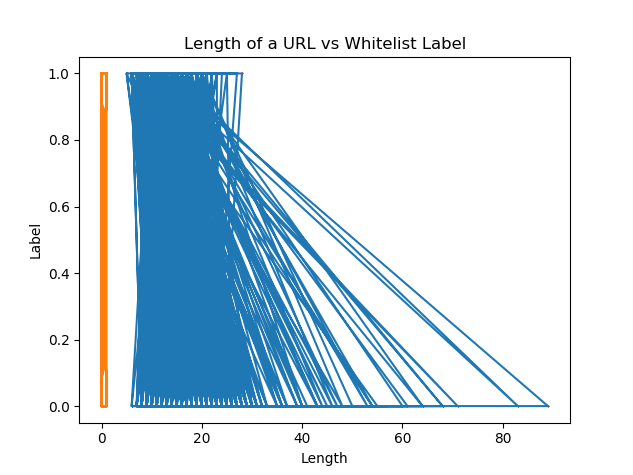

Text(0,0.5,'Label')

In [9]:
plt.plot(dataframe.LENGTH.values,  dataframe.LABEL.values, 'r*', markersize='1')
plt.title('Length of a URL vs Whitelist Label')
plt.xlabel('Length')
plt.ylabel('Label')

In [10]:
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'RU'] = 1.0 if '.ru' in row['URL'] else 0.0

In [17]:
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'Com'] = 1.0 if '.com' in row['URL'] else 0.0

In [19]:
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'Org'] = 1.0 if '.org' in row['URL'] else 0.0

In [21]:
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'Co'] = 1.0 if '.co.' in row['URL'] else 0.0

In [22]:
dataframe.sample(n=5)

,LABEL,URL,LENGTH,RU,Com,Org,Co
1307,1,thegospelcoalition.org,22.0,0.0,0.0,1.0,0.0
1176,0,mobileappexperts.in,19.0,0.0,0.0,0.0,0.0
1747,1,thisisanfield.com,17.0,0.0,1.0,0.0,0.0
1025,1,friday.tw,9.0,0.0,0.0,0.0,0.0
815,1,uptodate.com,12.0,0.0,1.0,0.0,0.0


In [116]:
data = dataframe[['LENGTH', 'Com']].values
labels = dataframe[['LABEL']].values
labels = labels.reshape(len(labels),)

In [117]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.25)

In [118]:
classifier = LogisticRegression(penalty='l2', C=2.0)

In [119]:
classifier.fit(data_train, labels_train)

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
sklearn.metrics.accuracy_score(classifier.predict(data_test), labels_test)

0.714